In [1]:
#Import data from EXCEL

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
%matplotlib inline
import seaborn as sns
from pandas.tseries.offsets import MonthEnd
from datetime import date
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.ticker as mtick
from matplotlib import rcParams
#rcParams['font.family'] = 'proxima-nova'
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.dates as mdates


mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0


mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rcParams['figure.titlesize'] = 30
legend_properties = {'weight':'regular','size':20}
mpl.rcParams['patch.facecolor']='xkcd:white'
plt.rc('font', weight='regular', size=18)
legend_properties = {'weight':'regular','size':20}
today = date.today()
p_year=today.year-1
print(p_year)
from datetime import datetime
from dateutil.relativedelta import relativedelta, FR
#OIX Colours
prussianblue=(7/255,44/255,83/255)
pacificblue=(48/255,186/255,196/255)
richblue=(34/255,155/255,212/255)
blue=(0/255,44/255,248/255)
navy=(0/255,18/255,125/255)
petrolblack=(14/255,26/255,32/255)
petrolblack80=(63/255,72/255,76/255)
petrolblack60=(111/255,118/255,121/255)
petrolblack40=(159/255,163/255,166/255)
petrolblack20=(207/255,209/255,210/255)
curr_month=today + MonthEnd(-1)

past=today+relativedelta(days=1)-relativedelta(days=6)
past

prev_fr=past + relativedelta(weekday=FR(-1))
prev_fr
year_5=today.year-6

2021


In [2]:
#Load Cargo Tracking data
CT=pd.read_csv("CargoTracking_unmasked copy.csv")
CT["LoadDate"]=pd.Series(pd.to_datetime(CT["LoadDate"],dayfirst=True,errors='ignore')).dt.date
CT["DischargeDate"]=pd.Series(pd.to_datetime(CT["DischargeDate"],dayfirst=True,errors='coerce')).dt.date
CT["LoadDate"]=pd.to_datetime(CT["LoadDate"])
CT["DischargeDate"]=pd.to_datetime(CT["DischargeDate"])

CT["Duration"]=(CT["DischargeDate"]-CT["LoadDate"]).dt.days
CT.head()

,IMO,VesselName,VesselClass,LoadDate,LoadArea,LoadCountry,LoadSubcountryArea,LoadPort,LoadSTSIndicator,LoadSTSIMO,...,DischargePort,DischargeSTSIndicator,DischargeSTSIMO,DestinationCountry,DestinationCountryGroup,Charterer,Supplier,Buyer,LastUpdateDate,Duration
0,7380693,BW Cidade De Sao Vicente,Suezmax,2019-08-16,Brazil,Brazil,NaN,Angra Dos Reis,0,-1,...,Suape,0,-1,Brazil,NaN,NaN,NaN,Petrobras,2022-03-03,364
1,7408081,Leo,Aframax,2014-12-06,West Coast South America,Chile,NaN,Talcahuano,0,-1,...,Corpus Christi,0,-1,United States,OECD Americas,NaN,NaN,NaN,2021-08-26,29
2,7408081,Leo,Aframax,2014-12-06,West Coast South America,Chile,NaN,Talcahuano,0,-1,...,Corpus Christi,0,-1,United States,OECD Americas,NaN,NaN,NaN,2021-08-26,36
3,7408081,Leo,Aframax,2015-01-13,US Gulf,United States,PADD 3: Gulf Coast,Corpus Christi,0,-1,...,Loop,0,-1,United States,OECD Americas,NaN,NaN,NaN,2022-03-24,5
4,7408081,Leo,Aframax,2015-01-29,US Gulf,United States,PADD 3: Gulf Coast,St. James (Louisiana),0,-1,...,New York,0,-1,United States,OECD Americas,NaN,NaN,NaN,2021-08-26,10


In [3]:
data=CT[["LoadDate", "LoadCountry","LoadPort","DischargeCountry","DischargePort","Duration"]]
data

,LoadDate,LoadCountry,LoadPort,DischargeCountry,DischargePort,Duration
0,2019-08-16,Brazil,Angra Dos Reis,Brazil,Suape,364
1,2014-12-06,Chile,Talcahuano,United States,Corpus Christi,29
2,2014-12-06,Chile,Talcahuano,United States,Corpus Christi,36
3,2015-01-13,United States,Corpus Christi,United States,Loop,5
4,2015-01-29,United States,St. James (Louisiana),United States,New York,10
...,...,...,...,...,...,...
229063,2022-02-04,Russian Federation,Kozmino,United States,Anacortes,23
229064,2022-03-19,Panama,Panama Pacific Lightering Zone,United States,Long Beach,20
229065,2022-04-11,United States,Long Beach,United States,Long Beach,3
229066,2022-04-04,Saudi Arabia,Ras Tanura,Japan,Kiire,22


<AxesSubplot:ylabel='Density'>

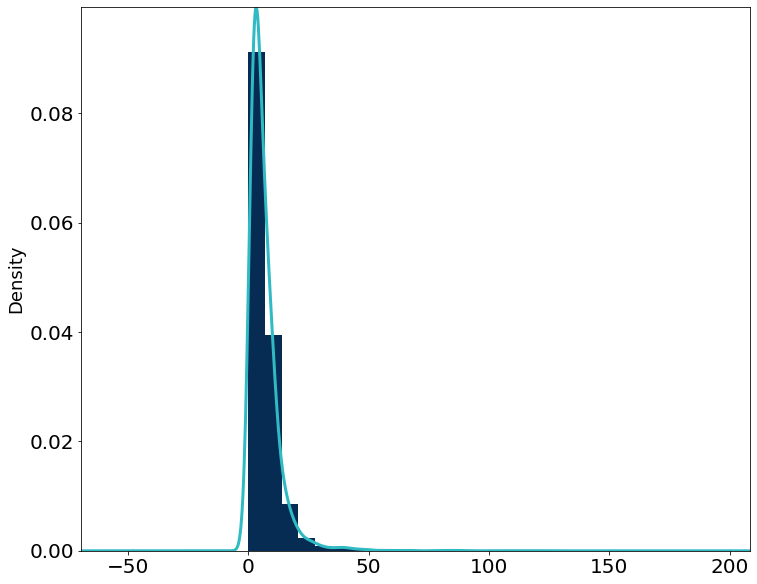

In [4]:
ENTERLOAD = "United States"
ENTERDIS = "United States"

fig, ax = plt.subplots(figsize = (12,10))
fig.patch.set_facecolor('xkcd:white')

data[   (data["LoadCountry"]==ENTERLOAD)  &  (data["DischargeCountry"]==ENTERDIS) ]["Duration"].plot.hist(bins=20,density=True,color=prussianblue,ax=ax)
data[   (data["LoadCountry"]==ENTERLOAD)  &  (data["DischargeCountry"]==ENTERDIS) ]["Duration"].plot.kde(bw_method=0.3,c=pacificblue,lw=3,ax=ax)

In [5]:
#creating functions to filter ports by country
LoadCountries = data["LoadCountry"].unique()
DisCountries = data["DischargeCountry"].unique()
LPorts = data["LoadPort"].unique()
DPorts = data["DischargePort"].unique()

#code to gather ports for dropdown menu
def get_load_ports(country):
    ports = data[ (data["LoadCountry"] == country)]["LoadPort"].unique().tolist()
    return ports
def get_dis_ports(country):
    ports = data[ (data["DischargeCountry"] == country)]["DischargePort"].unique().tolist()
    return ports

LoadCountries

array(['Brazil', 'Chile', 'United States', 'Venezuela', 'Curacao', 'Cuba',
       'Italy', 'Malta', 'Indonesia', 'Saudi Arabia', 'Iraq', 'India',
       'Kuwait', 'Singapore', 'Malaysia', 'Norway', 'Angola', 'Togo',
       'Gabon', 'Egypt', 'Russian Federation', 'Iran', 'Thailand',
       'Yemen', 'United Arab Emirates', 'Cyprus', 'Turkey', 'Libya',
       'Nigeria', 'Taiwan', 'Brunei Darussalam', 'Aruba', 'South Africa',
       'Panama', 'Greece', 'Dominican Republic',
       'Bonaire, Sint Eustatius and Saba', 'Qatar', 'Morocco', 'Pakistan',
       'Oman', 'China', 'Sri Lanka', 'Eritrea', 'Algeria', 'Colombia',
       'United Kingdom', 'Mexico', 'Bahrain', 'Sudan', 'Jordan',
       'Viet Nam', 'Georgia', 'Canada', 'Equatorial Guinea', 'Gibraltar',
       'Bahamas', 'France', 'Denmark', 'Ghana', "Cote d'Ivoire", 'Spain',
       'Korea, Republic of', 'Trinidad and Tobago', 'Papua New Guinea',
       'Tunisia', 'Ukraine', 'Congo', 'Ireland', 'Cameroon', 'Ecuador',
       'Australia', 'N

In [13]:
import chart_studio
username = 'OilXDeveloper' # your username
api_key = '123' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [11]:
#SEARCH BY PORTS!!

import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output


#code to set up the layout of the screen
app = dash.Dash()

df = px.data

app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = 'Trip Duration Between Ports', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
        "Load Country",
        dcc.Dropdown( id = 'dropdown',
        options = LoadCountries,
        value = 'United States'),
    
        "Load Port",
        dcc.Dropdown( id = 'lport')
        ,
    
        "Discharge Country",
        dcc.Dropdown( id = 'dropdown2',
        options = DisCountries,
        value = 'United States'),
    
        "Discharge Port",
        dcc.Dropdown(id = 'dport'),
    
        dcc.Graph(id = 'bar_plot')
    ])
    

#code to adjust the load ports based on country 
@app.callback(Output(component_id='lport', component_property= 'options'),
              [Input(component_id='dropdown', component_property= 'value')],
                )
def update_dropdown(name):
    return get_load_ports(name)

#code to adjust the discharge ports based on discharge country and based on load port data
@app.callback(Output(component_id='dport', component_property= 'options'),
              [Input(component_id='dropdown2', component_property= 'value'),
               Input(component_id='lport', component_property= 'value')],
                )
def update_dropdown(name,lport):
    if lport == None:
        return get_dis_ports(name)
    else:
        ports = data[ (data["DischargeCountry"] == name) & (data["LoadPort"] == lport)]["DischargePort"].unique().tolist()
        return ports

#updating the graph given all of the user inputted data (can search by country or port)
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value'),
              Input(component_id='dropdown2', component_property= 'value'),
              Input(component_id='lport', component_property= 'value'),
              Input(component_id='dport', component_property= 'value'),
                ])

def graph_update(lvalue, dvalue, lport, dport):
    if (lport != None) & (dport != None):
        data2 = data[ (data["LoadCountry"]== '{}'.format(lvalue))  &  (data["DischargeCountry"]== '{}'.format(dvalue)) 
                & (data["LoadPort"]== '{}'.format(lport)) & (data["DischargePort"]== '{}'.format(dport)) ]
        fig = go.Figure([go.Scatter(x = data2['LoadDate'], y = data2["Duration"], mode = "markers")])
                     
    elif (lport == None) & (dport != None):
        data2 = data[ (data["LoadCountry"]== '{}'.format(lvalue))  &  (data["DischargeCountry"]== '{}'.format(dvalue)) 
                & (data["DischargePort"]== '{}'.format(dport)) ]
        fig = go.Figure([go.Scatter(x = data2['LoadDate'], y = data2["Duration"], mode = "markers")])
        
    elif (lport != None) & (dport == None):
        data2 = data[ (data["LoadCountry"]== '{}'.format(lvalue))  &  (data["DischargeCountry"]== '{}'.format(dvalue)) 
                & (data["LoadPort"]== '{}'.format(lport)) ]
        fig = go.Figure([go.Scatter(x = data2['LoadDate'], y = data2["Duration"], mode = "markers")])
        
    else:
        data2 = data[ (data["LoadCountry"]== '{}'.format(lvalue))  &  (data["DischargeCountry"]== '{}'.format(dvalue)) ]
        fig = go.Figure([go.Scatter(x = data2['LoadDate'], y = data2["Duration"], mode = "markers")])
      
    
    fig.update_layout(title = 'Trip Durations',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Duration'
                      )
    return fig

if __name__ == '__main__': 
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


In [8]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
import numpy as np

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Interactive plot with custom data source'),
    dcc.Graph(id="graph"),
    html.P("Number of bars:"),
    dcc.Slider(id="slider", min=2, max=10, value=4, step=1),
])


@app.callback(
    Output("graph", "figure"), 
    Input("slider", "value"))
def update_bar_chart(size):
    data = np.random.normal(3, 2, size=size) # replace with your own data source
    fig = go.Figure(
        data=[go.Bar(y=data)],
        layout_title_text="Native Plotly rendering in Dash"
    )
    return fig

app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
